## Data Analysis

***

## Project Description

Now it's time to analyze Fond Rouge's data in the SAP Analytics Cloud (SAC). SAC is a best-in-class SaaS solution that combines all the analytics functionalities (Planning, Predictive, Business Intelligence, and more) in one intuitive user interface, helping us save time & effort and make better decisions.

## Data sources used

* All Sales transactions
* All Returns of products
* The monthly Sentiment scores (based on NPS + social sentiment score), in every location, for every product

## Business Task

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

#Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df1 = pd.read_csv("sales.csv", parse_dates=['Date'])

In [3]:
df1.head()

,OrderID,Date,Country,City,Latitude,Longtitude,ProductCategoryName,ProductID,Product,Quantity,Discount,Price,Status
0,order-9dd87a4c-7374-446a-845b-37fa211c121a,2019-02-08,Belgium,Brussels,50.85,4.35,Brogues,product-124ef52a-c7c3-48af-b315-33a14b2f6e1d,François,7,3.96,41.45,COMPLETED
1,order-47acd540-c1dd-47a8-a5dc-39cee5c43a5e,2019-03-10,Belgium,Brussels,50.85,4.35,Brogues,product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e,Denis,9,1.42,58.95,COMPLETED
2,order-fd686823-060b-4d59-bd0a-512f87eb6654,2019-04-10,Belgium,Brussels,50.85,4.35,Flats,product-0a97c64c-582b-41a9-b367-2a4e081cf3d5,Estelle,5,2.14,45.61,COMPLETED
3,order-6e3e2947-bf9c-4993-9215-307d1a61cf92,2019-05-24,Belgium,Brussels,50.85,4.35,Platforms,product-642f72ba-c5d6-4126-be0f-a22fe4e9fbb6,Bella,8,4.55,46.93,COMPLETED
4,order-28117cd2-a47e-42ef-a619-fe52ec2cd7b2,2019-06-22,Belgium,Brussels,50.85,4.35,Stilettos,product-fa4a41fc-4a31-44b5-953f-8e2a45b43673,Cecile,4,3.92,78.56,COMPLETED


In [4]:
df1.shape

(9450, 13)

In [5]:
df2 = pd.read_csv("returns.csv")

In [6]:
df2.head()

,OrderID,Status
0,order-8cacb48a-6a1e-42de-abe2-cf6092a48af2,RETURNED
1,order-f696bafe-acd9-4985-a4ad-05da86cc8268,RETURNED
2,order-3c18c650-b023-4b3e-bc03-e6ae455329ff,RETURNED
3,order-6b940800-f65e-4717-ac18-bd12e0e91400,RETURNED
4,order-766719c3-2fe4-4fc9-8d44-26c10a575ea2,RETURNED


In [7]:
df3 = pd.merge(left=df1, right=df2, on="OrderID", how="inner")

In [8]:
df3

,OrderID,Date,Country,City,Latitude,Longtitude,ProductCategoryName,ProductID,Product,Quantity,Discount,Price,Status_x,Status_y
0,order-064459d9-d81d-4410-9320-8097de3804e1,2019-09-15,Belgium,Brussels,50.85,4.35,Flats,product-f709c12a-ffe5-48b1-a3d2-f247acf8e176,Danielle,7,0.18,36.46,COMPLETED,RETURNED
1,order-5d4f7bd9-b6c8-42e6-b345-31da3db5bdc5,2020-01-01,Belgium,Brussels,50.85,4.35,Stilettos,product-7bef3e02-033c-4259-93da-a25f4f7169be,Claudette,6,0.60,102.95,COMPLETED,RETURNED
2,order-e31cc2fa-31c1-4cd8-a78b-53e9a5da78b2,2020-05-15,Belgium,Brussels,50.85,4.35,Platforms,product-b7c06d0a-977d-497b-ae3e-95b58985cafd,Amélie,6,3.06,40.00,COMPLETED,RETURNED
3,order-33677257-805a-4b99-b41d-a32517d2ac26,2020-05-25,Belgium,Brussels,50.85,4.35,Stilettos,product-7bef3e02-033c-4259-93da-a25f4f7169be,Claudette,6,2.41,102.95,COMPLETED,RETURNED
4,order-3c18c650-b023-4b3e-bc03-e6ae455329ff,2020-07-05,Belgium,Brussels,50.85,4.35,Brogues,product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e,Denis,10,5.41,58.95,COMPLETED,RETURNED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,order-94410d02-26e0-464c-8695-af1aff36e56d,2021-02-16,United States,San Diego,32.83,-117.12,Platforms,product-98f22154-ee97-4ef8-be84-7283cec0ebad,Bridgette,1,0.58,39.95,COMPLETED,RETURNED
834,order-09e912f8-793d-42a2-adaf-46f2c9fa392f,2021-02-01,United States,San Diego,32.83,-117.12,Platforms,product-98f22154-ee97-4ef8-be84-7283cec0ebad,Bridgette,4,2.94,39.95,COMPLETED,RETURNED
835,order-3b57ee4e-69f7-49ae-9b74-866dbd9f83b3,2021-02-16,United States,San Diego,32.83,-117.12,Platforms,product-98f22154-ee97-4ef8-be84-7283cec0ebad,Bridgette,1,1.59,39.95,COMPLETED,RETURNED
836,order-833e19fb-21f0-4850-a8b3-ea2a0ed42a5c,2021-02-12,United States,San Diego,32.83,-117.12,Brogues,product-20700833-fc84-4340-9a59-669fe6acc94b,Antoine,2,1.19,45.95,COMPLETED,RETURNED


In [9]:
df3.drop(["OrderID","Country","ProductID"], axis=1, inplace=True)

In [10]:
df3.head()

,Date,City,Latitude,Longtitude,ProductCategoryName,Product,Quantity,Discount,Price,Status_x,Status_y
0,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED
1,2020-01-01,Brussels,50.85,4.35,Stilettos,Claudette,6,0.60,102.95,COMPLETED,RETURNED
2,2020-05-15,Brussels,50.85,4.35,Platforms,Amélie,6,3.06,40.00,COMPLETED,RETURNED
3,2020-05-25,Brussels,50.85,4.35,Stilettos,Claudette,6,2.41,102.95,COMPLETED,RETURNED
4,2020-07-05,Brussels,50.85,4.35,Brogues,Denis,10,5.41,58.95,COMPLETED,RETURNED


In [11]:
df4 = pd.read_csv("sentiment.csv", parse_dates=["Year_Month"])

In [12]:
df4.head()

,Year_Month,Location_ID,ProductID,Product,Sentiment,Class
0,2018-02-01,"Belgium, Brussels",product-20700833-fc84-4340-9a59-669fe6acc94b,Antoine,90,POS
1,2018-02-01,"Belgium, Brussels",product-124ef52a-c7c3-48af-b315-33a14b2f6e1d,François,92,POS
2,2018-02-01,"Belgium, Brussels",product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e,Denis,88,POS
3,2018-02-01,"Belgium, Brussels",product-9f6a916a-271c-4d78-9e5f-f802bbcf6548,Adele,91,POS
4,2018-02-01,"Belgium, Brussels",product-f709c12a-ffe5-48b1-a3d2-f247acf8e176,Danielle,90,POS


In [13]:
df4.drop(["Year_Month","ProductID"], axis=1, inplace=True)

In [14]:
df4.head()

,Location_ID,Product,Sentiment,Class
0,"Belgium, Brussels",Antoine,90,POS
1,"Belgium, Brussels",François,92,POS
2,"Belgium, Brussels",Denis,88,POS
3,"Belgium, Brussels",Adele,91,POS
4,"Belgium, Brussels",Danielle,90,POS


In [15]:
df5 = pd.merge(left=df3, right=df4, on="Product", how="inner")

In [16]:
df5

,Date,City,Latitude,Longtitude,ProductCategoryName,Product,Quantity,Discount,Price,Status_x,Status_y,Location_ID,Sentiment,Class
0,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",90,POS
1,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",88,POS
2,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",89,POS
3,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",83,NEU
4,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",92,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711457,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",43,NEG
711458,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",45,NEG
711459,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",42,NEG
711460,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",40,NEG


## Data Preprocessing

### Treat Missing Values

In [17]:
df5.isnull().sum()

Date                   0
City                   0
Latitude               0
Longtitude             0
ProductCategoryName    0
Product                0
Quantity               0
Discount               0
Price                  0
Status_x               0
Status_y               0
Location_ID            0
Sentiment              0
Class                  0
dtype: int64

### Treat Duplicate Values

In [18]:
df5.duplicated(keep='first').sum()

481786

In [19]:
df5[df5.duplicated(keep=False)] #Check duplicate values

,Date,City,Latitude,Longtitude,ProductCategoryName,Product,Quantity,Discount,Price,Status_x,Status_y,Location_ID,Sentiment,Class
0,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",90,POS
1,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",88,POS
2,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",89,POS
3,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",83,NEU
5,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",90,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711455,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",49,NEG
711456,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",49,NEG
711457,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",43,NEG
711458,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",45,NEG


In [20]:
df5.drop_duplicates(ignore_index=True, inplace=True)

In [21]:
df5

,Date,City,Latitude,Longtitude,ProductCategoryName,Product,Quantity,Discount,Price,Status_x,Status_y,Location_ID,Sentiment,Class
0,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",90,POS
1,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",88,POS
2,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",89,POS
3,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",83,NEU
4,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",92,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229671,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",46,NEG
229672,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",43,NEG
229673,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",49,NEG
229674,2021-02-20,San Diego,32.83,-117.12,Flats,Adele,3,3.39,35.90,COMPLETED,RETURNED,"United States, San Diego",42,NEG


In [22]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229676 entries, 0 to 229675
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 229676 non-null  datetime64[ns]
 1   City                 229676 non-null  object        
 2   Latitude             229676 non-null  float64       
 3   Longtitude           229676 non-null  float64       
 4   ProductCategoryName  229676 non-null  object        
 5   Product              229676 non-null  object        
 6   Quantity             229676 non-null  int64         
 7   Discount             229676 non-null  float64       
 8   Price                229676 non-null  float64       
 9   Status_x             229676 non-null  object        
 10  Status_y             229676 non-null  object        
 11  Location_ID          229676 non-null  object        
 12  Sentiment            229676 non-null  int64         
 13  Class         

In [23]:
df5.describe()

,Latitude,Longtitude,Quantity,Discount,Price,Sentiment
count,229676.00,229676.00,229676.00,229676.00,229676.00,229676.00
mean,44.88,-23.72,5.47,2.70,54.77,83.71
std,6.88,46.54,2.82,1.89,21.28,11.57
min,32.83,-118.41,1.00,0.00,35.90,40.00
25%,40.69,-73.92,3.00,1.32,39.95,84.00
50%,45.76,-0.13,5.00,2.43,45.61,87.00
75%,51.51,4.84,8.00,3.59,78.56,90.00
max,60.18,26.08,10.00,10.26,102.95,92.00


In [24]:
df5.columns

Index(['Date', 'City', 'Latitude', 'Longtitude', 'ProductCategoryName', 'Product', 'Quantity', 'Discount', 'Price', 'Status_x', 'Status_y', 'Location_ID', 'Sentiment', 'Class'], dtype='object')

In [25]:
df5["Revenue"] = df5["Quantity"] * df5["Price"]

In [26]:
df5.head()

,Date,City,Latitude,Longtitude,ProductCategoryName,Product,Quantity,Discount,Price,Status_x,Status_y,Location_ID,Sentiment,Class,Revenue
0,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",90,POS,255.22
1,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",88,POS,255.22
2,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",89,POS,255.22
3,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",83,NEU,255.22
4,2019-09-15,Brussels,50.85,4.35,Flats,Danielle,7,0.18,36.46,COMPLETED,RETURNED,"Belgium, Brussels",92,POS,255.22


### Save to CSV

In [27]:
#df5.to_csv("datafinal.csv", index=False)

In [28]:
df5 = pd.read_csv("datafinal.csv", parse_dates=["Date"])

### 1A. In what city Fond Rouge loses the highest % revenue due to returns?

In [29]:
df5.groupby("City")["Revenue"].min().sort_values()

City
Lyon           35.90
Toulouse       35.90
San Diego      36.46
Rome           36.46
Prague         36.46
Paris          36.46
New York       36.46
London         36.46
Amsterdam      39.95
Copenhagen     39.95
Liverpool      40.00
Helsinki       40.00
Lisbon         45.61
Los Angeles    45.61
Brussels       45.95
Rotterdam      58.95
Atlanta        71.80
Dublin         72.92
Madrid         78.56
Las Vegas      79.90
Vienna         79.90
Genève         91.22
Stockholm      91.22
Berlin         91.90
Zürich         93.86
Tallinn       109.38
Warsaw        291.68
Sofia         320.00
Bucharest     392.80
Name: Revenue, dtype: float64

In [30]:
df5.City.unique()

array(['Brussels', 'Prague', 'Tallinn', 'Dublin', 'Madrid', 'Paris',
       'Lyon', 'Toulouse', 'Rome', 'Amsterdam', 'Rotterdam', 'Vienna',
       'Warsaw', 'Lisbon', 'London', 'New York', 'Atlanta', 'Los Angeles',
       'San Diego', 'Copenhagen', 'Bucharest', 'Stockholm', 'Liverpool',
       'Sofia', 'Helsinki', 'Las Vegas', 'Zürich', 'Genève', 'Berlin'],
      dtype=object)

In [31]:
newyork = df5[df5["City"] == 'New York']

In [32]:
atlanta = df5[df5["City"] == 'Atlanta']

In [33]:
losangeles = df5[df5["City"] == 'Los Angeles']

In [34]:
sandiego = df5[df5["City"] == 'San Diego']

In [35]:
lasvegas = df5[df5["City"] == 'Las Vegas']

In [36]:
usa_stores = pd.concat([newyork,atlanta,losangeles,sandiego,lasvegas],axis=0)

In [37]:
usa_stores.reset_index(drop=True, inplace=True)

In [38]:
usa_stores

,Date,City,Latitude,Longtitude,ProductCategoryName,Product,Quantity,Discount,Price,Status_x,Status_y,Location_ID,Sentiment,Class,Revenue
0,2020-01-28,New York,40.69,-73.92,Flats,Danielle,6,1.76,36.46,COMPLETED,RETURNED,"Belgium, Brussels",90,POS,218.76
1,2020-01-28,New York,40.69,-73.92,Flats,Danielle,6,1.76,36.46,COMPLETED,RETURNED,"Belgium, Brussels",88,POS,218.76
2,2020-01-28,New York,40.69,-73.92,Flats,Danielle,6,1.76,36.46,COMPLETED,RETURNED,"Belgium, Brussels",89,POS,218.76
3,2020-01-28,New York,40.69,-73.92,Flats,Danielle,6,1.76,36.46,COMPLETED,RETURNED,"Belgium, Brussels",83,NEU,218.76
4,2020-01-28,New York,40.69,-73.92,Flats,Danielle,6,1.76,36.46,COMPLETED,RETURNED,"Belgium, Brussels",92,POS,218.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64313,2020-09-15,Las Vegas,36.23,-115.27,Flats,Adele,3,3.30,35.90,COMPLETED,RETURNED,"United States, San Diego",46,NEG,107.70
64314,2020-09-15,Las Vegas,36.23,-115.27,Flats,Adele,3,3.30,35.90,COMPLETED,RETURNED,"United States, San Diego",43,NEG,107.70
64315,2020-09-15,Las Vegas,36.23,-115.27,Flats,Adele,3,3.30,35.90,COMPLETED,RETURNED,"United States, San Diego",49,NEG,107.70
64316,2020-09-15,Las Vegas,36.23,-115.27,Flats,Adele,3,3.30,35.90,COMPLETED,RETURNED,"United States, San Diego",42,NEG,107.70


### 1B. Paste a screenshot of your Stacked Bar chart of Revenue & Refund per US city.

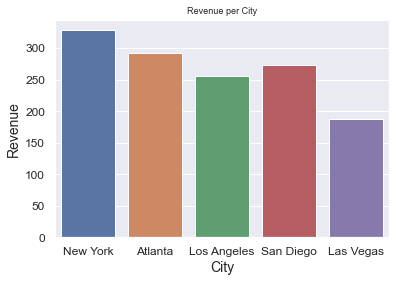

In [39]:
sns.barplot(x="City", y="Revenue", data=usa_stores, ci=None)
plt.title("Revenue per City")
plt.show()

### 2A. What is the % NEG Class-ifiers in the US?

In [40]:
usa_stores["Class"].value_counts()

POS    46198
NEU    11391
NEG     6729
Name: Class, dtype: int64

In [41]:
print(((6729/64318) * 100))

10.462079044746417


### 2B. Paste a screenshot of your Donut chart of Sentiment Class in the US

In [42]:
piechart = pd.DataFrame(usa_stores["Class"].value_counts())
piechart

,Class
POS,46198
NEU,11391
NEG,6729


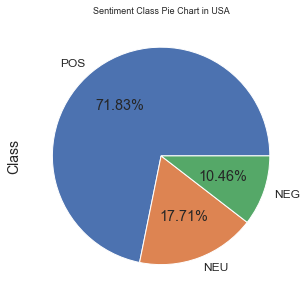

In [43]:
plt.figure(figsize=(5,5))
piechart["Class"].plot.pie(autopct="%.2f%%")
plt.title("Sentiment Class Pie Chart in USA")
plt.show()

### 3A. What is the % NEG Class-ifiers, Globally?

In [44]:
df5["Class"].value_counts()

POS    165039
NEU     40638
NEG     23999
Name: Class, dtype: int64

In [45]:
print(((23999/229676) * 100))

10.449067381877079


In [46]:
df5["Class"].describe()

count     229676
unique         3
top          POS
freq      165039
Name: Class, dtype: object

### 3B. Paste a screenshot of your Donut chart of Sentiment Class, Globally.

In [47]:
piechart2 = pd.DataFrame(df5["Class"].value_counts())
piechart2

,Class
POS,165039
NEU,40638
NEG,23999


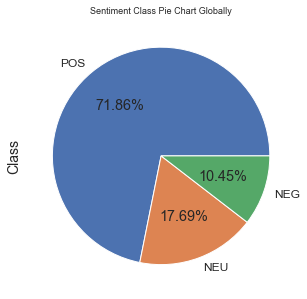

In [48]:
plt.figure(figsize=(5,5))
piechart2["Class"].plot.pie(autopct="%.2f%%")
plt.title("Sentiment Class Pie Chart Globally")
plt.show()

### 4A. List the locations where counterfeiting may be happening?

In [49]:
negative = df5[df5["Sentiment"] < 65]

In [50]:
negative.City.unique()

array(['Brussels', 'Prague', 'Tallinn', 'Dublin', 'Madrid', 'Paris',
       'Lyon', 'Toulouse', 'Rome', 'Amsterdam', 'Rotterdam', 'Vienna',
       'Warsaw', 'Lisbon', 'London', 'New York', 'Atlanta', 'Los Angeles',
       'San Diego', 'Copenhagen', 'Bucharest', 'Stockholm', 'Liverpool',
       'Sofia', 'Helsinki', 'Las Vegas', 'Zürich', 'Genève', 'Berlin'],
      dtype=object)

### 4B. Paste a screenshot of your Column & Line chart of Refund/Revenue & Avg Sentiment per US city.

In [51]:
line = usa_stores.groupby("City")['Sentiment','Revenue'].mean()
line

,Sentiment,Revenue
City,,
Atlanta,83.69,292.57
Las Vegas,83.72,187.40
Los Angeles,83.75,255.95
New York,83.71,328.38
San Diego,83.70,272.93


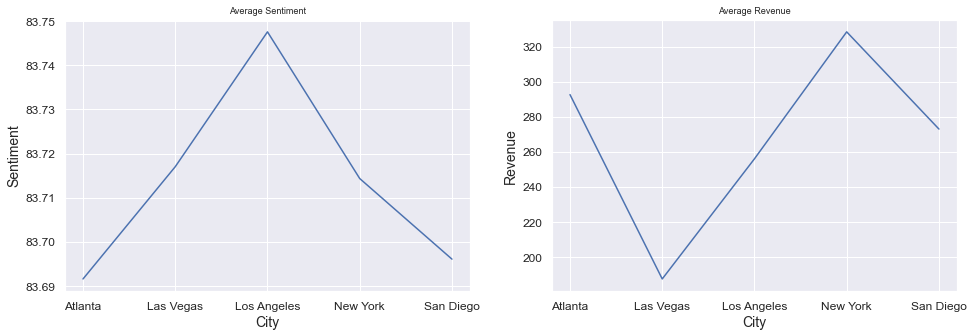

In [52]:
fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
#fig.suptitle('Main Title')

sns.lineplot(x=line.index, y=line.Sentiment, data=line, ax=ax[0])
ax[0].set_title('Average Sentiment')
#ax[0].tick_params('x', labelrotation=45)

sns.lineplot(x=line.index, y=line.Revenue, data=line, ax=ax[1])
ax[1].set_title('Average Revenue')

plt.show()

### 5. Does Fond Rouge have a problem in all of its American locations? How can you tell?

### 6. Is counterfeit the only problem that’s observable in Fond Rouge’s data for its US operation? Why?

### 7. Paste a screenshot of your GeoMap (Bubble Layer) of Location, Avg Sentiment, Revenue.

In [53]:
mapping = usa_stores[['City','Latitude','Longtitude','Sentiment','Revenue']]

In [54]:
mapping

,City,Latitude,Longtitude,Sentiment,Revenue
0,New York,40.69,-73.92,90,218.76
1,New York,40.69,-73.92,88,218.76
2,New York,40.69,-73.92,89,218.76
3,New York,40.69,-73.92,83,218.76
4,New York,40.69,-73.92,92,218.76
...,...,...,...,...,...
64313,Las Vegas,36.23,-115.27,46,107.70
64314,Las Vegas,36.23,-115.27,43,107.70
64315,Las Vegas,36.23,-115.27,49,107.70
64316,Las Vegas,36.23,-115.27,42,107.70


In [55]:
m = folium.Map(location=[37.090240,-95.712891], zoom_start=5)

In [56]:
m

In [57]:
map_df = pd.DataFrame(mapping.groupby(["City","Latitude","Longtitude"]).mean())

In [58]:
map_df.reset_index(inplace=True)

In [59]:
map_df

,City,Latitude,Longtitude,Sentiment,Revenue
0,Atlanta,33.76,-84.42,83.69,292.57
1,Las Vegas,36.23,-115.27,83.72,187.40
2,Los Angeles,34.11,-118.41,83.75,255.95
3,New York,40.69,-73.92,83.71,328.38
4,San Diego,32.83,-117.12,83.70,272.93


In [60]:
folium.Marker(location=[33.76,-84.42], popup="Atlanta", tooltip="Sentiment=83.69, Revenue=292.57").add_to(m)
folium.Marker(location=[36.23,-115.27], popup="Las Vegas", tooltip="Sentiment=83.72, Revenue=187.40").add_to(m)
folium.Marker(location=[34.11,-118.41], popup="Los Angeles", tooltip="Sentiment=83.75, Revenue=255.95").add_to(m)
folium.Marker(location=[40.69,-73.92], popup="New York", tooltip="Sentiment=83.71, Revenue=328.38").add_to(m)
folium.Marker(location=[32.83,-117.12], popup="San Diego", tooltip="Sentiment=83.70, Revenue=272.93").add_to(m)

m

#### Python code done by Dennis Lam